## Salary Predictions Based on Job Descriptions
### Part 1 - DEFINE
<b> ----- 1 Define the problem ------ <br>
    The objective of this work is to determine the accuarcy of salary predictions based on a set of job features <br> 

<u><b>Target 

- Salary

<u><b>Features 
1. jobID (e.g., JOB1362685407687)  
2. companyID (e.g., COMP33) 
3. jobType (eg., Manager)
4. degree (e.g., MASTERS)
5. major (e.g., BIOLOGY)
6. industry (e.g., HEALTH)
7. yearsExperience (e.g., 17)
8. milesFromMetropolis (e.g., 44) 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 

## Part 2 - DISCOVER
<b>---- Load data ----

In [39]:
dataPath = "C:\\Users\\denny\\Main\\Data_science\\Portfolio development course\\Salary-Prediction\\data\\"
trainFeatures = pd.read_csv(dataPath + "train_features.csv")
trainSalaries = pd.read_csv(dataPath + "train_salaries.csv")
testFeatures  = pd.read_csv(dataPath + "test_features.csv")

<b> --- Examine data ---

In [40]:
trainFeatures.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [41]:
print("Size of train features dataset = ",np.shape(trainFeatures))

Size of train features dataset =  (1000000, 8)


In [42]:
testFeatures.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [43]:
print("Size of test features dataset = ",np.shape(testFeatures))

Size of test features dataset =  (1000000, 8)


In [44]:
trainSalaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [45]:
print("Size of train salaries dataset = ",np.shape(trainSalaries))

Size of train salaries dataset =  (1000000, 2)


<b>--- Clean data ---

In [46]:
trainFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


trainFeatures dataframe information shows that--
* First six columns are categorical variables 
* Last two coloumns are numeric cariables 
* There are no missing values 

In [47]:
testFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [48]:
trainSalaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [49]:
# Merging training features and training salaries 
trainDF = pd.merge(trainFeatures, trainSalaries, how='inner', on = None, left_index=False, right_index=False)
trainDF.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [50]:
# Remove dupliate rows from the dataframe  
trainDF.drop_duplicates()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


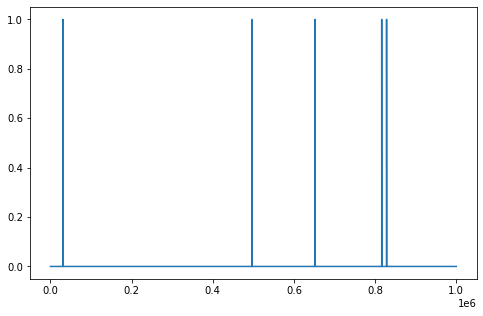

In [51]:
# Checking is there any salary values less than or eqal to zero
plt.figure(figsize=(8,5))
plt.plot (trainDF.salary<=0)
plt.show()

This shows that there are a few instances of salary less than 0. Salaries less than zero are incorrect entries. Hence, we need to remove these rows 
from dataframe. 
<br> Let's examine rows containing salary <=0. 

In [52]:
badSalaryDF = trainDF[trainDF.salary<=0]
badSalaryDF

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


There are five rows with salary = zero. Next, I am going to remove these rows from the dataframe. 

In [53]:
trainDFGood = trainDF[trainDF.salary > 0]

In [54]:
trainDFGood.count()

jobId                  999995
companyId              999995
jobType                999995
degree                 999995
major                  999995
industry               999995
yearsExperience        999995
milesFromMetropolis    999995
salary                 999995
dtype: int64

This shows, now we have 999995 observations to train our model. 

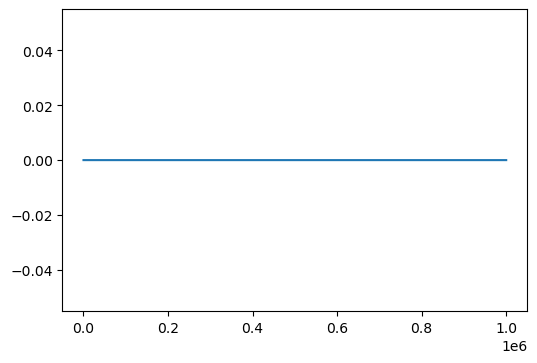

In [56]:
# Let us plot and see again. 
plt.figure(dpi=100)
plt.plot(trainDFGood["salary"] <= 0)
plt.show()

The new dataframe does not contain less than zero salaries

<br> == Examine the Relationship of Features to Target, which is the saary ==

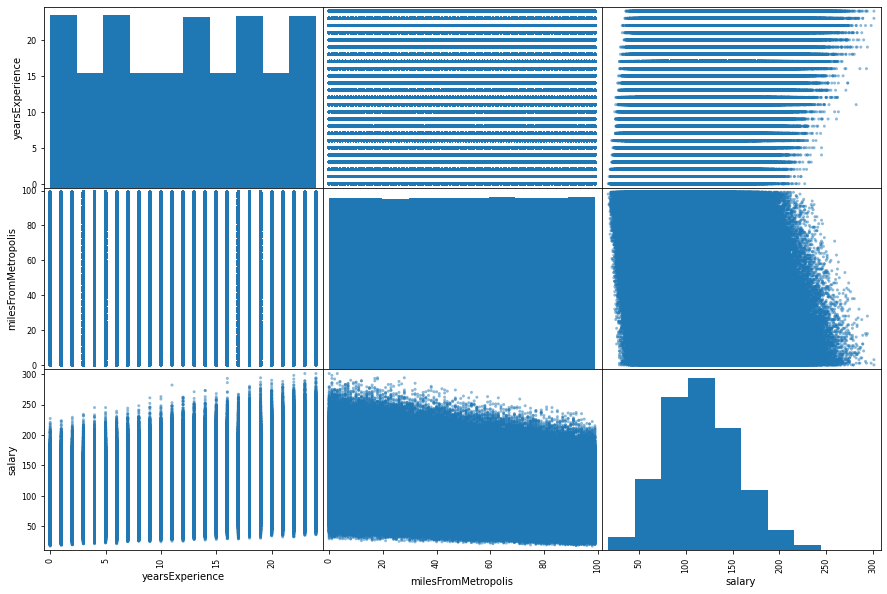

In [70]:
pd.plotting.scatter_matrix(trainDFGood, figsize=(15,10), diagonal = "hist")
plt.show()

This scatter matrix shows that the salary increases with years of experience and decreses with distance from metropolis. Therefore, the features "yearsExperience" and "milesFromMetropolis" are good features to include in the ML model. <br>
However, we cannot ignore the importance of categorical variables such as degree, jobType, major and industry

I am going to examine how some of these features related to the salary

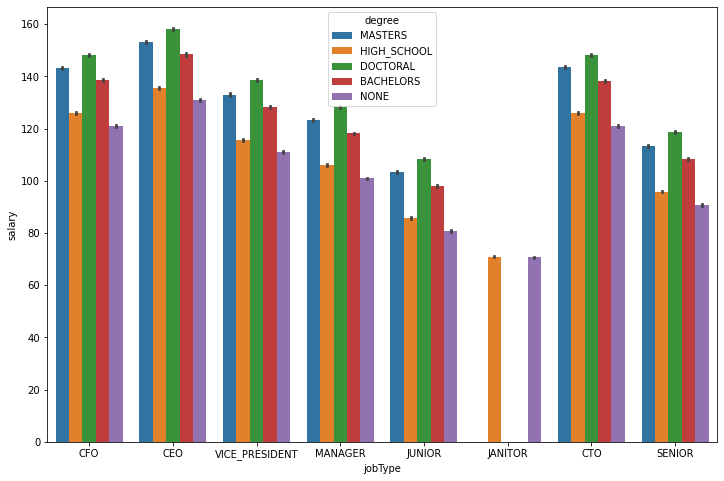

In [100]:
plt.figure(figsize=(12,8))
sns.barplot(x="jobType", y="salary", hue="degree", data=trainDFGood)
plt.show()

As expected, job type and degree are important factors that determines the salary. CEOs have maximum average salary. CFO and CTO salries come next. For a given category of job, doctoral degree holders have maximum avaerage salary. Therefore, jobType and degree are good features to use in our ML models.  

Now I am going to check how the industry and major related to salary 

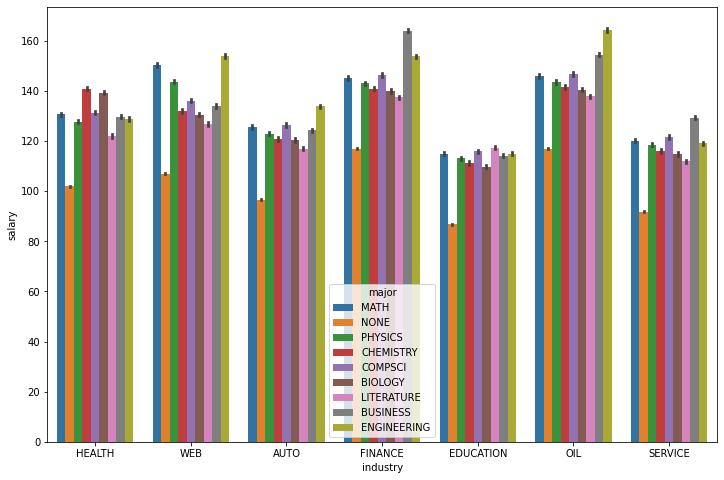

In [104]:
plt.figure(figsize=(12,8))
sns.barplot(x="industry", y="salary", hue="major", data=trainDFGood)
plt.show()

Hmm..., this is intersting. It is obvious that Finance and Oil industry gets maximum salaries. People with business major get higher salries where as in the Oil industry it is engineers. Education sector pays the lowest salaries! It is less than or comparable with service sector. Health and Auto industries are comparable. Computer science majors get lower or comparable salries to Math and Physics majors. Chemistry tops in health sector. Well, that's a lot of great insights!

One more final relationship to check. The relationship of JobID and companyID to salary. 

In [110]:
plt.figure(figsize=(12,8))
plt.scatter(trainDFGood["jobId"], trainDFGood["salary"] )
plt.show()

KeyboardInterrupt: 

<b>--- Encode Categorical Features --- <b> <br>
I am going to encode the categorical variables. Following are the categorical variables     
1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry

In [64]:
np.unique(trainDFGood["degree"])

array(['BACHELORS', 'DOCTORAL', 'HIGH_SCHOOL', 'MASTERS', 'NONE'],
      dtype=object)

Here, the feature "degree" can be considered as an Ordinal Variable. All others are Nominal Variable. 

In [46]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(trainDF[["jobId","companyId", "jobType","degree","major","industry"]])

trainDF[["jobId","companyId", "jobType","degree","major","industry"]] = enc.transform(trainDF[["jobId","companyId", "jobType","degree","major","industry"]])

# Next, I am going to try the encoding using OneHotEncoding 

[0. 1. 2. 3. 4. 5. 6. 7.]
6.0    125886
7.0    125234
5.0    125120
2.0    125045
3.0    124971
0.0    124778
4.0    124592
1.0    124369
Name: jobType, dtype: int64


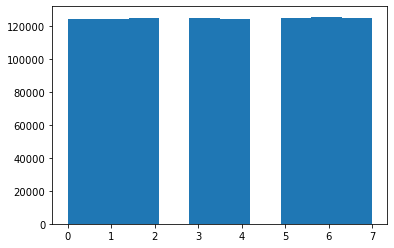

In [66]:
# trainDF.plot(kind="hist", x="jobType")


plt.hist(trainDF["jobType"])
print(np.unique(trainDF["jobType"]))
print(trainDF["jobType"].value_counts()) 

In [52]:
enc.categories_

[array(['JOB1362684407687', 'JOB1362684407688', 'JOB1362684407689', ...,
        'JOB1362685407684', 'JOB1362685407685', 'JOB1362685407686'],
       dtype=object),
 array(['COMP0', 'COMP1', 'COMP10', 'COMP11', 'COMP12', 'COMP13', 'COMP14',
        'COMP15', 'COMP16', 'COMP17', 'COMP18', 'COMP19', 'COMP2',
        'COMP20', 'COMP21', 'COMP22', 'COMP23', 'COMP24', 'COMP25',
        'COMP26', 'COMP27', 'COMP28', 'COMP29', 'COMP3', 'COMP30',
        'COMP31', 'COMP32', 'COMP33', 'COMP34', 'COMP35', 'COMP36',
        'COMP37', 'COMP38', 'COMP39', 'COMP4', 'COMP40', 'COMP41',
        'COMP42', 'COMP43', 'COMP44', 'COMP45', 'COMP46', 'COMP47',
        'COMP48', 'COMP49', 'COMP5', 'COMP50', 'COMP51', 'COMP52',
        'COMP53', 'COMP54', 'COMP55', 'COMP56', 'COMP57', 'COMP58',
        'COMP59', 'COMP6', 'COMP60', 'COMP61', 'COMP62', 'COMP7', 'COMP8',
        'COMP9'], dtype=object),
 array(['CEO', 'CFO', 'CTO', 'JANITOR', 'JUNIOR', 'MANAGER', 'SENIOR',
        'VICE_PRESIDENT'], dtype=object),

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

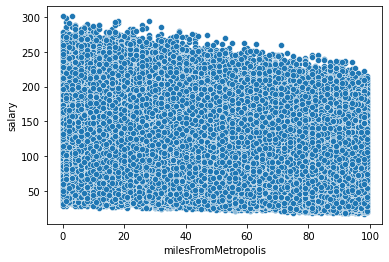

In [38]:
sns.scatterplot(y=trainDF["salary"], x=trainDF["milesFromMetropolis"])

In [42]:
heatDF = trainDF[["salary","yearsExperience","milesFromMetropolis"]]
# sns.heatmap(heatDF)
heatDF


,salary,yearsExperience,milesFromMetropolis
0,130,10,83
1,101,3,73
2,137,10,38
3,142,8,17
4,163,8,16
...,...,...,...
999995,88,19,94
999996,160,12,35
999997,64,16,81
999998,149,6,5


<b> Now our trainDF is ready <br> 
<b> --- encode the data ---

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
enc = OneHotEncoder(handle_unknown='ignore')
trainEncDF = enc.fit(trainDF)

In [24]:
enc.categories_

[array(['JOB1362684407687', 'JOB1362684407688', 'JOB1362684407689', ...,
        'JOB1362685407684', 'JOB1362685407685', 'JOB1362685407686'],
       dtype=object),
 array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 

In [57]:
pd.get_dummies(trainDF).head()

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,0.0,130,31.0,1.0,3.0,6.0,3.0,10,83
1,1.0,101,11.0,0.0,2.0,7.0,6.0,3,73
2,2.0,137,48.0,7.0,1.0,8.0,3.0,10,38
3,3.0,142,32.0,5.0,1.0,2.0,0.0,8,17
4,4.0,163,60.0,7.0,0.0,8.0,2.0,8,16


In [26]:
def f(x):
    return (x+2)*2
l = [1,2,3,4]
k = map(f,l)
print(k)

In [27]:
l

[1, 2, 3, 4]

In [28]:
ll = np.array([1,2,3,4])

In [29]:
ll


array([1, 2, 3, 4])

In [30]:
(ll+2)*2

array([ 6,  8, 10, 12])